<a href="https://colab.research.google.com/github/SaulHL08/Notebooks-Datos-Masivos/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[6.81276596 3.07446809]
 [5.006      3.418     ]
 [5.77358491 2.69245283]]


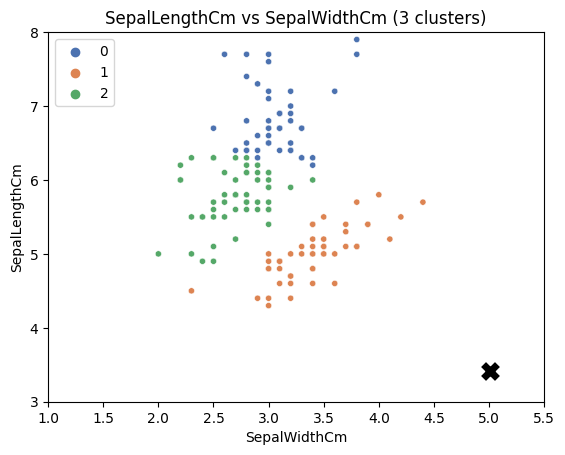

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Montar Google Drive para acceder al archivo "Iris.csv"
from google.colab import drive
drive.mount('/content/drive')

# Cargar el conjunto de datos desde Google Drive
data = pd.read_csv('/content/drive/MyDrive/Iris.csv')

# Seleccionar las columnas "SepalLengthCm" y "SepalWidthCm"
X = data[["SepalLengthCm", "SepalWidthCm"]]

# Realizar el análisis de clúster
k = 3  # Número de clústeres
cls = KMeans(n_clusters=k)
cls.fit(X)

# Obtener los centroides y etiquetas
centroids = cls.cluster_centers_
labels = cls.labels_

# Imprimir los centroides
print(centroids)

# Obtener las coordenadas x e y de los centroides
centroids_x = centroids[:, 1]
centroids_y = centroids[:, 0]

# Visualizar los datos y los centroides
sns.scatterplot(x="SepalWidthCm", y="SepalLengthCm", hue=labels, data=X, palette='deep', s=20)
plt.legend(loc='upper left')
plt.title("SepalLengthCm vs SepalWidthCm (3 clusters)")
plt.xlim([1, 5.5])
plt.ylim([3, 8])

# Dibujar los centroides
plt.scatter(centroids_y, centroids_x, marker="x", s=100, linewidths=5, c='black')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min

# Calcular la inercia (suma de las distancias al cuadrado de cada punto al centroide más cercano)
inertia = 0
for i in range(k):
    cluster_points = X[labels == i]
    cluster_center = centroids[i]
    inertia += np.sum((cluster_points - cluster_center) ** 2)

print("Inercia:", inertia)

Inercia: SepalLengthCm    8.746353
SepalWidthCm     8.477431
dtype: float64


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, labels)
print("Coeficiente de Silueta:", silhouette_avg)

Coeficiente de Silueta: 0.3977744662052161
